# STEP 3: Download and prepare green reflectance data

## Working with **raster** data

**Raster** data is arranged on a grid – for example a digital
photograph.

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-read"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Read More</div></div><div class="callout-body-container callout-body"><p>Learn more about raster data at this <a
href="https://www.earthdatascience.org/courses/use-data-open-source-python/intro-raster-data-python/">Introduction
to Raster Data with Python</a></p></div></div>

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Import stored variables and libraries</div></div><div class="callout-body-container callout-body"><p>For this case study, you will need a library for working with
geospatial raster data (<code>rioxarray</code>), more advanced libraries
for working with data from the internet and files on your computer
(<code>requests</code>, <code>zipfile</code>, <code>io</code>,
<code>re</code>). You will need to add:</p>
<ol type="1">
<li>A library for building interoperable file paths</li>
<li>A library to locate files using a pattern with wildcards</li>
</ol></div></div>

First

In [2]:
%store -r denver_redlining_gdf data_dir

In [3]:
import os # Reproducible file paths
import re # Extract metadata from file names
import zipfile # Work with zip files
from io import BytesIO # Stream binary (zip) files
from glob import glob # Find files by pattern

import numpy as np # Unpack bit-wise Fmask
import requests # Request data over HTTP
import rioxarray as rxr # Work with geospatial raster data

### Download raster data

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Download sample data</div></div><div class="callout-body-container callout-body"><ol type="1">
<li>Define a descriptive variable with the sample data url: <a
href="https://github.com/cu-esiil-edu/esiil-learning-portal/releases/download/data-release/redlining-foundations-data.zip">https://github.com/cu-esiil-edu/esiil-learning-portal/releases/download/data-release/redlining-foundations-data.zip</a></li>
<li>Define a descriptive variable with the path you want to store the
sample raster data.</li>
<li>Use a conditional to make sure you only download the data once!</li>
<li>Check that you successfully downloaded some <code>.tif</code>
files.</li>
</ol></div></div>

In [4]:
# Prepare URL and file path for download
hls_url = ("https://github.com/cu-esiil-edu/esiil-learning-portal"
"/releases/download/data-release/redlining-foundations-data.zip")

hls_dir = os.path.join(data_dir, 'hls')

# Only download data once
if not os.path.exists(hls_dir):
    # Download sample raster data
    response = requests.get(hls_url)

# Save the raster data (uncompressed)
    with zipfile.ZipFile(BytesIO(response.content)) as hls_zip:
        hls_zip.extractall(hls_dir)

### Working with multispectral data

The data you just downloaded is **multispectral** raster data. When you
take a color photograph, your camera actually takes three images that
get combined – a red, a green, and a blue image (or band, or channel).
Multispectral data is a little like that, except that it also often
contains spectral bands from outside the range human eyes can see. In
this case, you should have a Near-Infrared (NIR) band as well as the
red, green, and blue.

This multispectral data is part of the [Harmonized Landsat Sentinel 30m
dataset](https://lpdaac.usgs.gov/products/hlsl30v002/) (HLSL30), which
is a combination of data taken by the NASA Landsat missions and the
European Space Agency (ESA) Sentinel-2 mission. Both missions collect
multispectral data, and combining them gives us more frequent images,
usually every 2-3 days. Because they are harmonized with Landsat
satellites, they are also comparable with Landsat data from previous
missions, which go back to the 1980s.

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-read"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Read More</div></div><div class="callout-body-container callout-body"><p>Learn more about multispectral data in this <a
href="https://www.earthdatascience.org/courses/use-data-open-source-python/multispectral-remote-sensing/intro-multispectral-data/">Introduction
to Multispectral Remote Sensing Data</a></p></div></div>

For now, we’ll work with the green layer to get some practice opening up
raster data.

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Find the green layer file</div></div><div class="callout-body-container callout-body"><p>One of the files you downloaded should contain the
<strong>green</strong> band. To open it up:</p>
<ol type="1">
<li>Check out the <a
href="https://lpdaac.usgs.gov/documents/1698/HLS_User_Guide_V2.pdf">HLSL30
User Guide</a> to determine which band is the green one. The band number
will be in the file name as <code>Bxx</code> where <code>xx</code> is
the two-digit band number.</li>
<li>Write some code to <strong>reproducibly</strong> locate that file on
any system. Make sure that you get the <strong>path</strong>, not a
<strong>list</strong> containing the path.</li>
<li>Run the starter code, which opens up the green layer.</li>
<li>Notice that the values range from 0 to about 2500. Reflectance
values should range from 0 to 1, but they are <strong>scaled</strong> in
most files so that they can be represented as 16-bit integers instead of
64-bit float values. This makes the file size 4x smaller without any
loss of accuracy! To make sure that the data are scaled correctly in
Python, go ahead and add the <code>mask_and_scale=True</code> parameter
to the <code>rxr.open_rasterio</code> function. Now your values should
run between 0 and about .25. <code>mask_and_scale=True</code> also
represents nodata or na values correctly as nan rather than, in this
case -9999. However, this image has been cropped so there are no nodata
values in it.</li>
<li>Notice that this array also has 3 <strong>dimensions</strong>:
<code>band</code>, <code>y</code>, and <code>x</code>. You can see the
dimensions in parentheses just to the right of
<code>xarray.DataArray</code> in the displayed version of the
<code>DataArray</code>. Sometimes we do have arrays with different
bands, for example if different multispectral bands are contained in the
same file. However, <code>band</code> in this case is not giving us any
information; it’s an artifact of how Python interacts with the
<code>geoTIFF</code> file format. Drop it as a dimension by using the
<code>.squeeze()</code> method on your <code>DataArray</code>. This
makes certain concatenation and plotting operations go smoother – you
pretty much always want to do this when importing a
<code>DataArray</code> with <code>rioxarray</code>.</li>
</ol></div></div>

In [8]:
# Find the path to the green layer
green_path = glob(os.path.join(hls_dir,"*B03.tif"))[0]

green_path

'C:\\Users\\alison\\Documents\\earth-analytics-class\\data\\redlining\\hls\\HLS.L30.T13SDD.2023193T173653.v2.0.B03.tif'

In [6]:
# Open the green data in Python
green_da = rxr.open_rasterio(green_path, mask_and_scale=True).squeeze() #correct values to normal scale #drop extra dimensions (band)
display(green_da)
green_da.plot(cmap='Greens', vmin=0, robust=True)

TypeError: invalid path or file: ['C:\\Users\\alison\\Documents\\earth-analytics-class\\data\\redlining\\hls\\HLS.L30.T13SDD.2023193T173653.v2.0.B03.tif']

### Cloud mask

In your original image, you may have noticed some splotches on the
image. These are clouds, and sometimes you will also see darker areas
next to them, which are cloud shadows. Ideally, we don’t want to include
either clouds or the shadows in our image! Luckily, our data comes with
a cloud mask file, labeled as the `Fmask` band.

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Take a look at the cloud mask</div></div><div class="callout-body-container callout-body"><ol type="1">
<li>Locate the <code>Fmask</code> file.</li>
<li>Load the <code>Fmask</code> layer into Python</li>
<li>Crop the <code>Fmask</code> layer</li>
<li>Plot the <code>Fmask</code> layer</li>
</ol></div></div>

Notice that your Fmask layer seems to range from 0 to somewhere in the
mid-200s. Our cloud mask actually comes as 8-bit **binary** numbers,
where each **bit** represents a different category of pixel we might
want to mask out.

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Process the Fmask</div></div><div class="callout-body-container callout-body"><ol type="1">
<li>Use the sample code below to <strong>unpack</strong> the cloud mask
data. Using <code>bitorder='little'</code> means that the bit indices
will match the Fmask categories in the User Guide, and
<code>axis=-1</code> creates a new dimension for the bits so that now
our array is <code>x</code>x<code>y</code>x8.</li>
<li>Look up the bits to mask in the User Guide. You should mask clouds,
adjacent to clouds, and cloud shadow, as well as water (because water
may confuse our greenspace analogy)</li>
</ol></div></div>

In [26]:
# Find the path to the fmask layer
fmask_path = glob(os.path.join(hls_dir,"*Fmask.tif"))[0]

fmask_path

'C:\\Users\\alison\\Documents\\earth-analytics-class\\data\\redlining\\hls\\HLS.L30.T13SDD.2023193T173653.v2.0.Fmask.tif'

<xarray.DataArray (y: 447, x: 504)> Size: 901kB
[225288 values with dtype=float32]
Coordinates:
    band         int64 8B 1
  * x            (x) float64 4kB 4.947e+05 4.947e+05 ... 5.097e+05 5.097e+05
  * y            (y) float64 4kB 4.4e+06 4.4e+06 4.4e+06 ... 4.387e+06 4.387e+06
    spatial_ref  int64 8B 0
Attributes: (12/33)
    ACCODE:                    Lasrc; Lasrc
    arop_ave_xshift(meters):   0, 0
    arop_ave_yshift(meters):   0, 0
    arop_ncp:                  0, 0
    arop_rmse(meters):         0, 0
    arop_s2_refimg:            NONE
    ...                        ...
    TIRS_SSM_MODEL:            UNKNOWN; UNKNOWN
    TIRS_SSM_POSITION_STATUS:  UNKNOWN; UNKNOWN
    ULX:                       399960
    ULY:                       4400040
    USGS_SOFTWARE:             LPGS_16.3.0
    AREA_OR_POINT:             Area

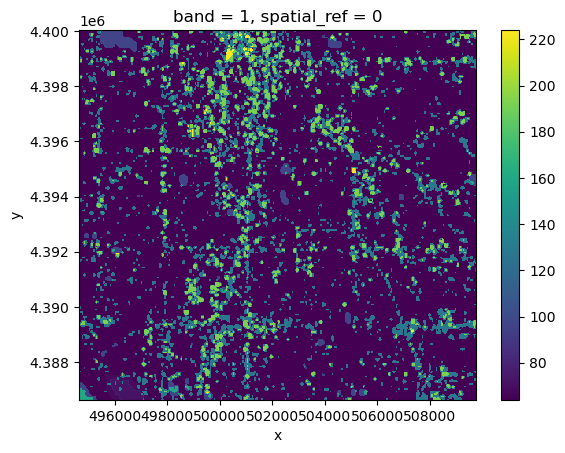

In [19]:
# Open the fmask data in Python
fmask_da = rxr.open_rasterio(fmask_path, mask_and_scale=True).squeeze()
display(fmask_da)
fmask_da.plot()

In [20]:
cloud_bits = (
    np.unpackbits(
        (
            # Get the cloud mask as an array...
            fmask_da.values
            # ... of 8-bit integers
            .astype('uint8')
            # With an extra axis to unpack the bits into
            [:, :, np.newaxis]
        ), 
        # List the least significant bit first to match the user guide
        bitorder='little',
        # Expand the array in a new dimension
        axis=-1)
)

bits_to_mask = [
    1, # Cloud
    2, # Adjacent to cloud
    3, # Cloud shadow
    5] # Water
cloud_mask = np.sum(
    # Select bits 1, 2, and 3 and 5
    cloud_bits[:,:,bits_to_mask], 
    # Sum along the bit axis
    axis=-1
# Check if any of bits 1, 2, 3, or 5 are true
) == 0

cloud_mask

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True]])

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Apply the cloud mask</div></div><div class="callout-body-container callout-body"><ol type="1">
<li>Use the <code>.where()</code> method to remove all the pixels you
identified in the previous step from your green reflectance
<code>DataArray</code>.</li>
</ol></div></div>

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Load all bands</div></div><div class="callout-body-container callout-body"><p>The sample data comes with 15 different bands. Some of these are
spectral bands, while others are things like a cloud mask, or the angles
from which the image was taken. You only need the spectral bands.
Luckily, all the spectral bands have similar file names, so you can use
<strong>indices</strong> to extract which band is which from the
name:</p>
<ol type="1">
<li>Fill out the <code>bands</code> dictionary based on the User Guide.
You will use this to replace band numbers from the file name with
human-readable names.</li>
<li>Locate the position of the band id number in the file path. It is
easiest to do this from the end, with negative indices. Fill out the
<code>start_index</code> and <code>end_index</code> variables with the
position values. You might need to test this before moving on!</li>
<li>Add code to open up the band in the spot to save it to the
<code>band_dict</code></li>
</ol></div></div>

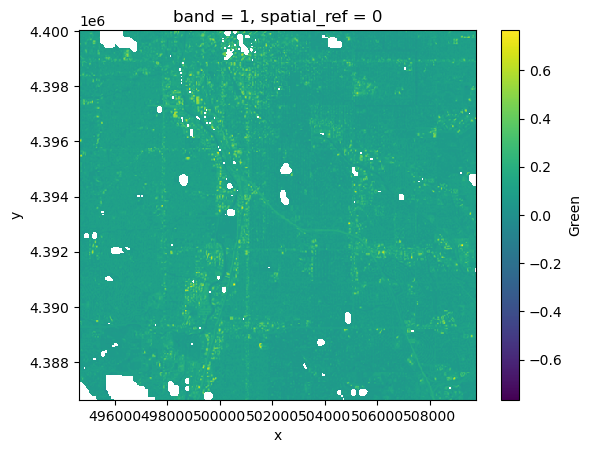

In [21]:
green_da.where(cloud_mask).plot(cmap='viridis')

{'aerosol': <xarray.DataArray (y: 447, x: 504)> Size: 901kB
 array([[0.0516    , 0.0686    , 0.0611    , ..., 0.0684    , 0.0598    ,
         0.0395    ],
        [0.0515    , 0.06439999, 0.0489    , ..., 0.0724    , 0.0675    ,
         0.0445    ],
        [0.0616    , 0.0581    , 0.0534    , ..., 0.0728    , 0.0616    ,
         0.0495    ],
        ...,
        [       nan,        nan,        nan, ..., 0.0633    , 0.0405    ,
         0.0395    ],
        [       nan,        nan,        nan, ..., 0.05      , 0.0359    ,
         0.0308    ],
        [       nan,        nan,        nan, ..., 0.0521    , 0.0489    ,
         0.0512    ]], dtype=float32)
 Coordinates:
     band         int64 8B 1
   * x            (x) float64 4kB 4.947e+05 4.947e+05 ... 5.097e+05 5.097e+05
   * y            (y) float64 4kB 4.4e+06 4.4e+06 4.4e+06 ... 4.387e+06 4.387e+06
     spatial_ref  int64 8B 0
 Attributes: (12/33)
     ACCODE:                    Lasrc; Lasrc
     arop_ave_xshift(meters):   0, 0


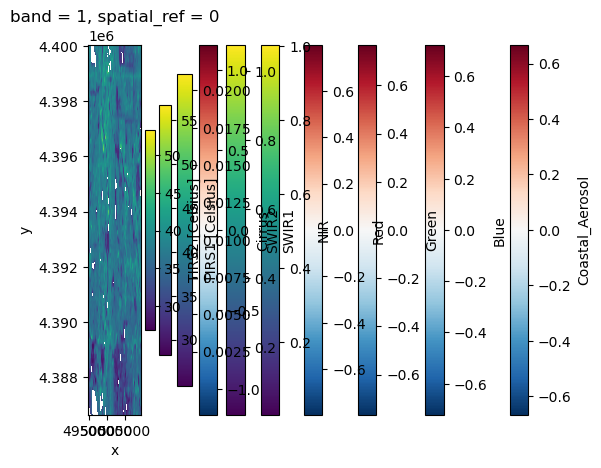

In [22]:
# Define band labels
bands = {
    'B01': 'aerosol',
    'B02': 'blue',
    'B03': 'green',
    'B04': 'red',
    'B05': 'nir',
    'B06': 'swir1',
    'B07': 'swir2',
    'B09': 'cirrus',
    'B10': 'thermal1',
    'B11': 'thermal2'
}

band_dict = {}
band_paths = glob(os.path.join(hls_dir, '*.B*.tif'))
for band_path in band_paths:
    # Get the band number and name
    start_index = -7
    end_index = -4
    band_id = band_path[start_index:end_index]
    band_name = bands[band_id]
    
    # Open the band and accumulate
    band_da = rxr.open_rasterio(band_path, mask_and_scale=True).squeeze()
    masked_da = band_da.where(cloud_mask)

    masked_da.plot()
    
    #Accumulate
    band_dict[band_name] = masked_da

band_dict

In [23]:
band_dict['green'].rio

In [24]:
%store band_dict

Stored 'band_dict' (dict)
